# Import Dependencies 

In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 
import os, cv2
from glob import glob

# Managing file paths 

In [2]:
main_dir = 'data'
train_path = os.path.join(main_dir, 'train')
test_path = os.path.join(main_dir, 'test')

In [3]:
classes = os.listdir(train_path)

In [4]:
train_imgs = glob(train_path+'*/*/*.jpg')
test_imgs = glob(test_path+'*/*/*.jpg')

In [5]:
len(train_imgs), len(test_imgs)

(2637, 660)

# Test Plotting

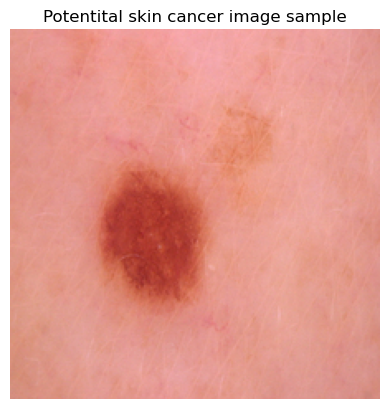

In [6]:
plt.imshow(tf.keras.preprocessing.image.load_img(np.random.choice(test_imgs)))
plt.axis('off')
plt.title('Potentital skin cancer image sample')
plt.show();

# Model building 

In [7]:
INPUT_SHAPE = [200, 200]
K = len(classes)

In [8]:
# calling the pre-trained model

ptm = tf.keras.applications.vgg16.VGG16(
    weights='imagenet',
    input_shape=INPUT_SHAPE + [3],
    include_top=False
)

ptm.trainable = False

2024-02-07 21:12:28.500242: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-02-07 21:12:28.500294: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-02-07 21:12:28.500303: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-02-07 21:12:28.500512: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-07 21:12:28.500864: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
# Functional approach of model building 

x = tf.keras.layers.Flatten()(ptm.output)
x = tf.keras.layers.Dense(K, activation='softmax')(x)

In [10]:
model = tf.keras.models.Model(inputs=ptm.input, outputs=x)

# Data Augmentation

In [11]:
# create a img data generator

generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,
    shear_range=0.1,
    rotation_range=10
    )

In [12]:
# create train gen and test gen

train_generator = generator.flow_from_directory(
    train_path,
    target_size=INPUT_SHAPE,
    shuffle=True,
    batch_size=128
)

test_generator = generator.flow_from_directory(
    test_path,
    target_size=INPUT_SHAPE,
    batch_size=128
)

Found 2637 images belonging to 2 classes.


Found 660 images belonging to 2 classes.


# Model training 

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.legacy.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [30]:
r = model.fit(train_generator, validation_data=test_generator, epochs=30, steps_per_epoch=len(train_generator))

Epoch 1/30
21/21 [==============================] - 93s 4s/step - loss: 0.5544 - accuracy: 0.8832 - val_loss: 1.3668 - val_accuracy: 0.8167
Epoch 2/30
21/21 [==============================] - 91s 4s/step - loss: 0.5923 - accuracy: 0.8881 - val_loss: 1.3115 - val_accuracy: 0.8364
Epoch 3/30
21/21 [==============================] - 89s 4s/step - loss: 0.5930 - accuracy: 0.8904 - val_loss: 1.4379 - val_accuracy: 0.8333
Epoch 4/30
21/21 [==============================] - 89s 4s/step - loss: 0.5910 - accuracy: 0.8934 - val_loss: 1.1890 - val_accuracy: 0.8227
Epoch 5/30
21/21 [==============================] - 94s 4s/step - loss: 0.5522 - accuracy: 0.8904 - val_loss: 1.3943 - val_accuracy: 0.8091
Epoch 6/30
21/21 [==============================] - 89s 4s/step - loss: 0.4887 - accuracy: 0.8919 - val_loss: 1.6186 - val_accuracy: 0.8348
Epoch 7/30
21/21 [==============================] - 91s 4s/step - loss: 0.5108 - accuracy: 0.8965 - val_loss: 1.3613 - val_accuracy: 0.8333
Epoch 8/30
21/21 [==

# Graph Plotting

In [23]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [24]:
def graphplotting(v1, v2):
    plt.plot(r.history[v1], label=v1)
    plt.plot(r.history[v2], label=v2)
    plt.grid()
    plt.legend()
    plt.xlabel('epochs')
    plt.ylabel(v1)
    plt.title(f'{v1} per epochs')
    plt.show();

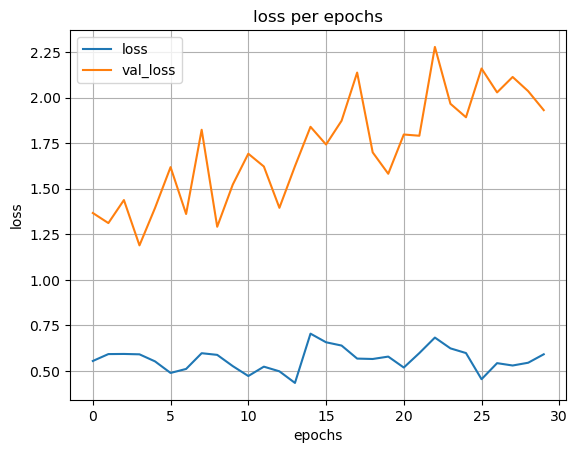

In [31]:
graphplotting('loss', 'val_loss')

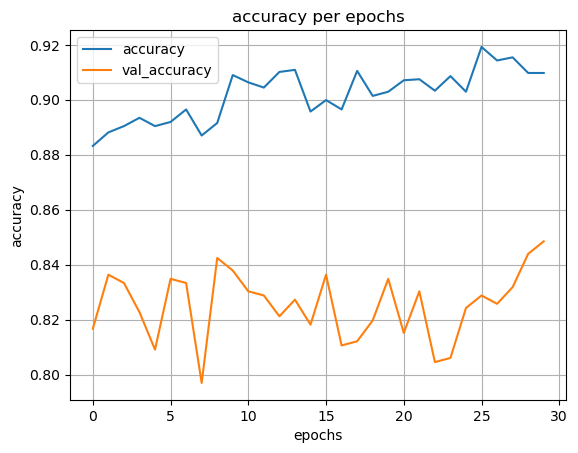

In [32]:
graphplotting('accuracy', 'val_accuracy')

# Prediction 

In [27]:
classes

['malignant', 'benign']

In [28]:
def make_prediction(test, prediction):
    num_of_images_to_predict = min(1, len(test))
    for i in range(num_of_images_to_predict):
        image_path = str(test[i])
        image = cv2.imread(image_path)
        if image is not None:
            image = cv2.resize(image, (200, 200))
            image = np.expand_dims(image, axis=0)
            pred = model.predict(image)
            pred_class = classes[np.argmax(pred)]
            plt.imshow(cv2.cvtColor(image[0], cv2.COLOR_BGR2RGB)) 
            plt.title(f'True class: {pred_class}, Predicted class: {prediction}')
            plt.axis('off')
            plt.show();

def plot_predictions():
    for _ in range(5):
        pred_class = np.random.choice(test_imgs)
        make_prediction(test=[pred_class], prediction=pred_class.split('/')[2])

1/1 [==============================] - 0s 17ms/step


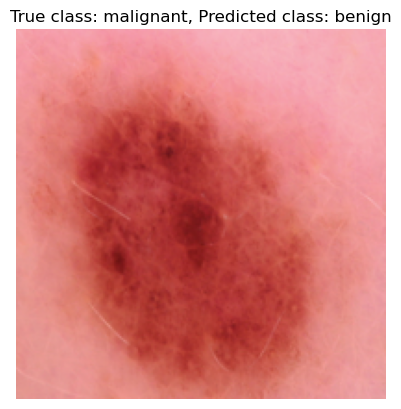

1/1 [==============================] - 0s 14ms/step


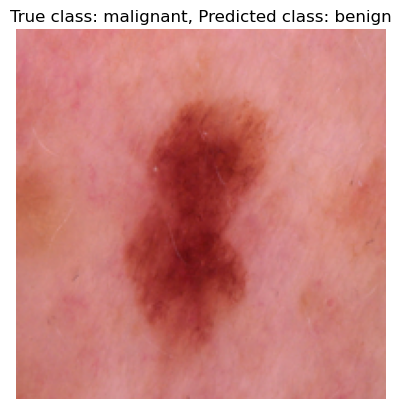

1/1 [==============================] - 0s 23ms/step


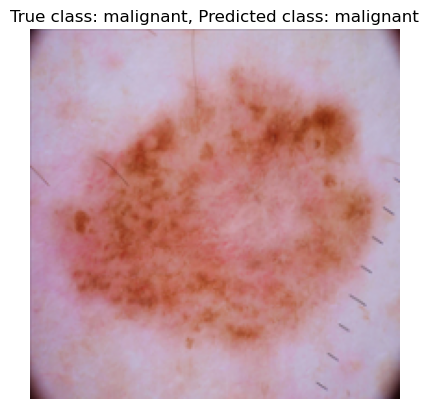

1/1 [==============================] - 0s 15ms/step


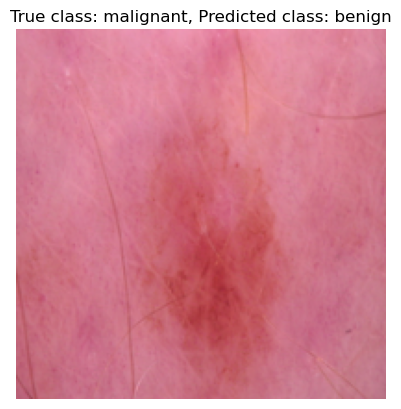

1/1 [==============================] - 0s 14ms/step


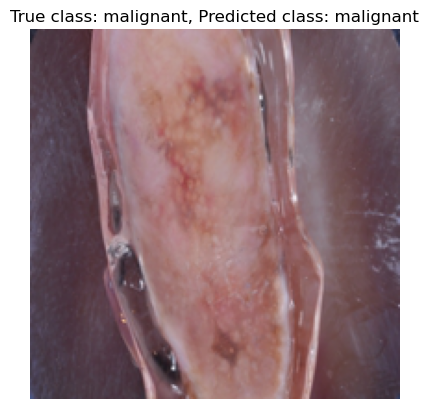

In [34]:
plot_predictions()

# Model Summary

In [22]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [ ]:
model.layers